Kmeans - Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
data = pd.read_csv('/content/gdrive/My Drive/Google Collab Files/DataSets/Mall_Customers.csv')

data.head()

#data.isna().sum() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = data.drop(columns= ['CustomerID'], axis = 1, errors='ignore')

data['Gender'] = data.Gender.map({ 'Male' : 1, 'Female' : 2})


#data.reset_index(drop=True, inplace=True)

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


Clustering On Stock Data Set

In [7]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,1.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,1.000000,28.750000,41.500000,34.750000
50%,2.000000,36.000000,61.500000,50.000000
75%,2.000000,49.000000,78.000000,73.000000
max,2.000000,70.000000,137.000000,99.000000


In [8]:
data.isna().sum() #no null values

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}

In [ ]:
wcss = []

for i in range(1,20):
  pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('estimator', KMeans(n_clusters=i, random_state=42))                
  ])
  pred = pipeline.fit(data)

  wcss.append(pipeline.named_steps['estimator'].inertia_)

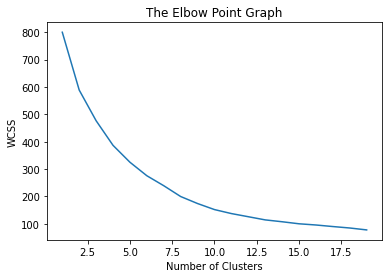

In [ ]:
# draw elbow graph

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,20), wcss)
plt.title('The Elbow Point Graph')

plt.show()

From the above curve may be taken as 12, after which the data pints appaer to be constant

In [10]:

pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('estimator', KMeans(n_clusters=6, random_state=42))                
  ])
pipeline.fit(data)

estimator = pipeline.named_steps['estimator']

X = pipeline.named_steps['scaler'].fit_transform(data)

Y = estimator.fit_predict(X)

print(Y)

[2 2 1 1 1 1 0 1 4 1 4 1 0 1 4 2 1 2 4 1 4 2 0 2 0 2 0 2 0 1 4 1 4 2 0 1 0
 1 0 1 0 2 4 1 0 1 0 1 1 1 0 2 1 4 0 4 0 4 1 4 4 2 0 0 4 2 0 0 2 1 4 0 0 0
 4 2 0 2 1 0 4 2 4 0 1 4 0 1 1 0 0 2 4 0 1 2 0 1 4 2 1 0 4 2 4 1 0 4 4 4 4
 1 0 2 1 1 0 0 0 0 2 0 0 2 1 3 5 2 4 2 5 2 1 3 5 3 0 2 5 3 0 2 1 3 5 2 5 3
 0 2 5 2 0 3 0 3 5 3 5 3 0 3 5 3 5 3 5 3 5 2 5 2 5 2 0 3 5 2 5 2 5 3 5 3 3
 2 0 2 5 3 5 3 5 3 5 3 5 3 5 3]


In [11]:
print('The no of cluster is :', np.unique(Y)) 

The no of cluster is : [0 1 2 3 4 5]


In [12]:
labels = pd.DataFrame(estimator.labels_)
data_with_labels = pd.concat((data,labels),axis=1)
data_with_labels = data_with_labels.rename({0:'labels'},axis=1)

data_with_labels.to_csv("temp.csv", index=False)

# New Section

In [13]:
pipeline.predict([[1, 19, 15, 39]])

array([2], dtype=int32)

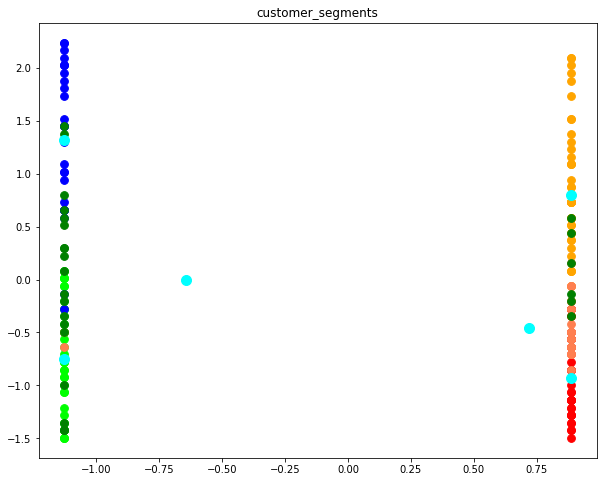

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=60, c='blue', label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1], s=60, c='green', label='Cluster 6')
plt.scatter(X[Y==6,0], X[Y==6,1], s=60, c='brown', label='Cluster 7')
plt.scatter(X[Y==7,0], X[Y==7,1], s=60, c='violet', label='Cluster 8')
plt.scatter(X[Y==8,0], X[Y==8,1], s=60, c='cyan', label='Cluster 9')
plt.scatter(X[Y==9,0], X[Y==9,1], s=60, c='magenta', label='Cluster 10')
plt.scatter(X[Y==10,0], X[Y==10,1], s=60, c='pink', label='Cluster 11')

# plot the centroids
plt.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('customer_segments')
plt.show()

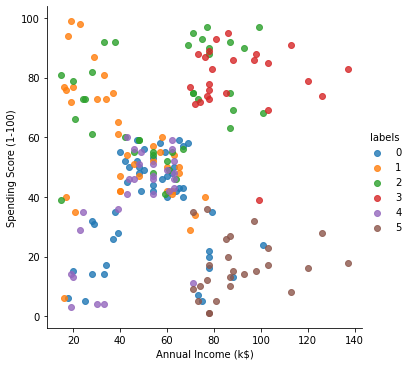

In [15]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data_with_labels,hue='labels',fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


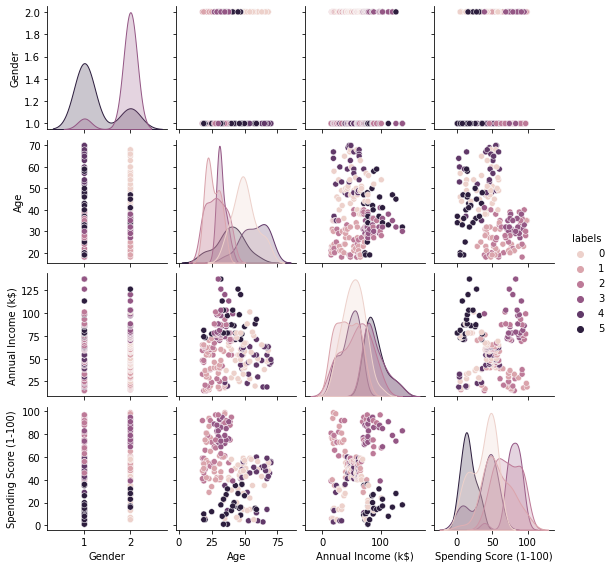

In [16]:
sns_plot  = sns.pairplot(data_with_labels,hue='labels', height=2)
sns_plot.savefig("output.png")

In [19]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(estimator.labels_)) - (1 if -1 in estimator.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 6


Evaluation

In [22]:
# Number of clusters in labels, ignoring noise if present.
X = pipeline.named_steps['scaler'].fit_transform(data)
print('Silhouette Coefficient: %0.3f'
      % metrics.silhouette_score(X, estimator.labels_))

Silhouette Coefficient: 0.335


In [23]:
labels = pipeline.predict(data[: 1])
print(labels)


[2]
